In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
def displayImage(img):
    newImage = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(newImage)
    plt.show()

Point 1: (277, 386)
[24 39 39]


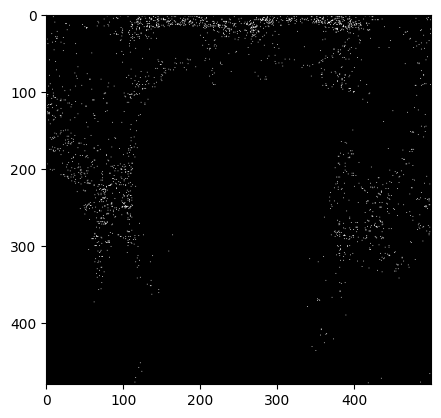

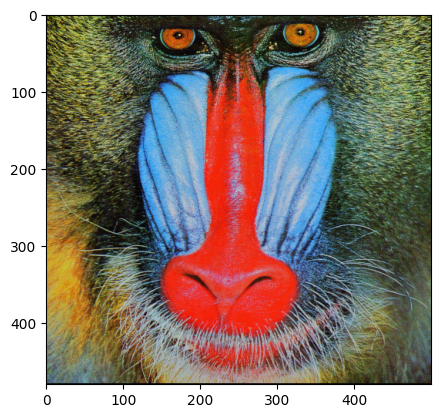

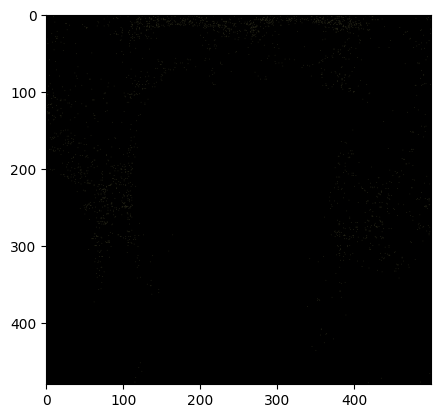

In [5]:
image= cv2.imread('baboon.jpg')
point = None
var1 = 0
var2 = 0


def clickFunction(event,x,y,flags,param):
    global point,var1,var2
    if event == cv2.EVENT_LBUTTONDOWN:
        if point is None:
            point = (x,y)
            var1=x
            var2=y
            print(f"Point 1: {point}")
            
        
        
cv2.namedWindow('image')
cv2.setMouseCallback('image',clickFunction)

while(True):
    cv2.imshow('image',image)
    key = cv2.waitKey(1)
    if key == 27:
        break
cv2.destroyAllWindows()

#creat the mask
mask = np.zeros(image.shape[:2], dtype=np.uint8)


pixel_value = image[var2, var1]

#set the values of B, G, R from the point that ws clicked on
b=pixel_value[0]
g=pixel_value[1]
r=pixel_value[2]
print(pixel_value)


#for every matching pixel for the color clicked on add a white pixel in the mask
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i,j,0]==b and image[i,j,1]==g and image[i,j,2]==r :
                 mask[i, j] = 255
      
#bitwise and operation between the mask and the original image
masked_image_and = cv2.bitwise_and(image, image, mask=mask)

displayImage(mask)  
displayImage(image)
displayImage(masked_image_and)